**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

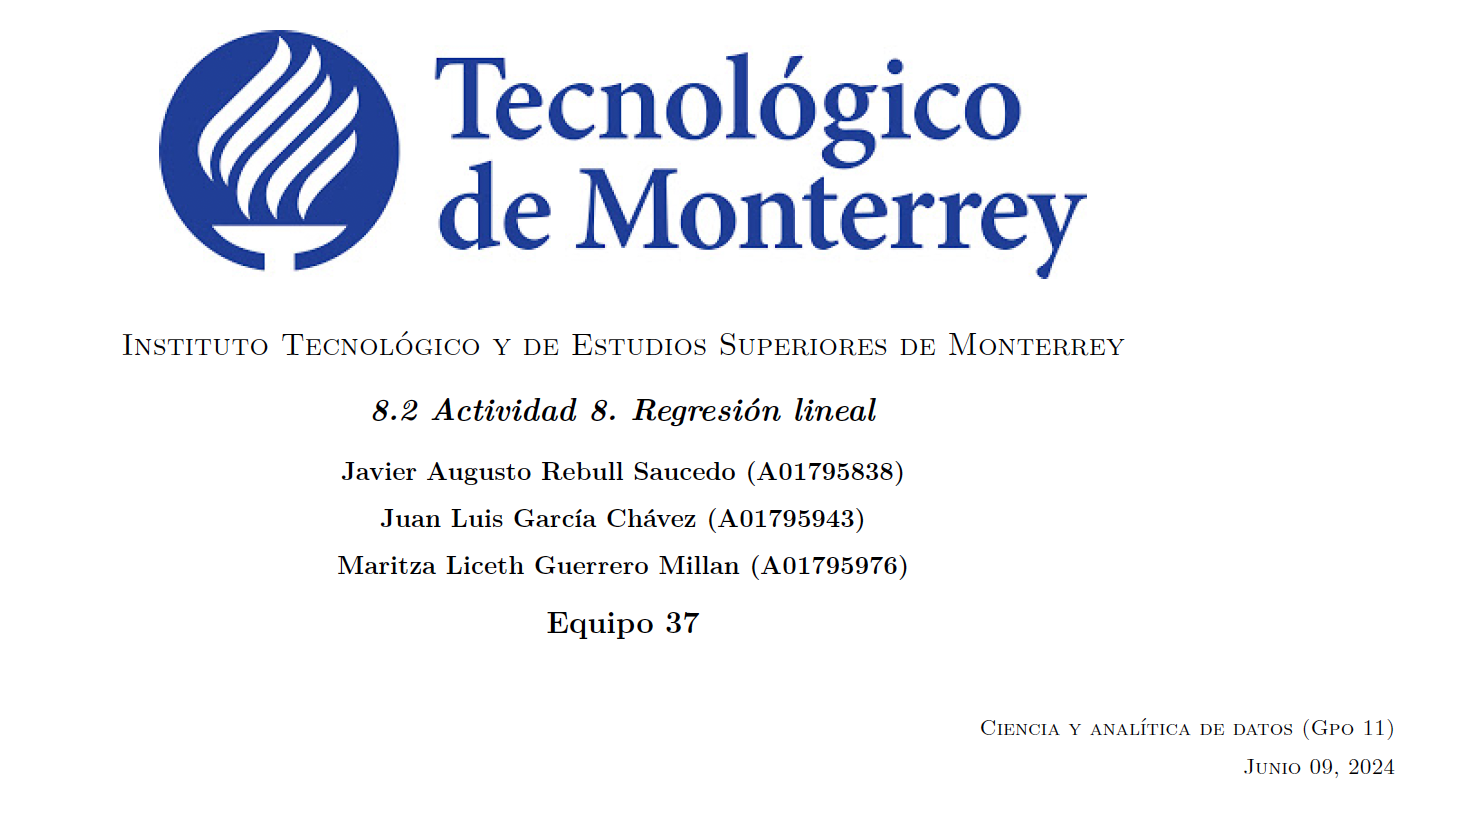

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Actividad8_RLineal"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.preprocessing import PolynomialFeatures

In [5]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [6]:
# Estadísticas descriptivas
estadisticas_descriptivas = insurance_df.describe()

print("Estadísticas Descriptivas obtenidas con éxito")
print('\n')
print(f"El DataFrame tiene {insurance_df.shape[1]} columnas y {insurance_df.shape[0]} registros totales.")
print('\n')
print(estadisticas_descriptivas)

Estadísticas Descriptivas obtenidas con éxito


El DataFrame tiene 7 columnas y 1338 registros totales.


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


1b) Búsqueda de valores faltantes.

In [7]:
# Búsqueda de valores faltantes
ValoresFaltantes = insurance_df.isnull().sum()

print("Búsqueda de valores faltantes completada")
print('\n')
print(ValoresFaltantes)

Búsqueda de valores faltantes completada


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.



Sección de Variables Cuantitativas




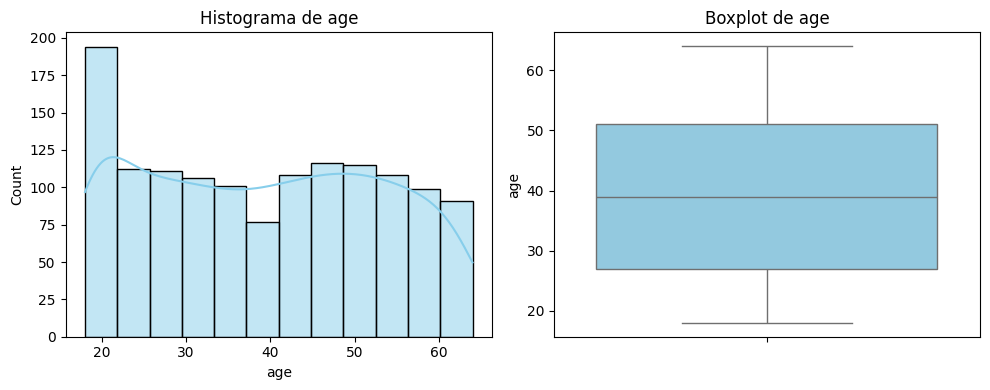

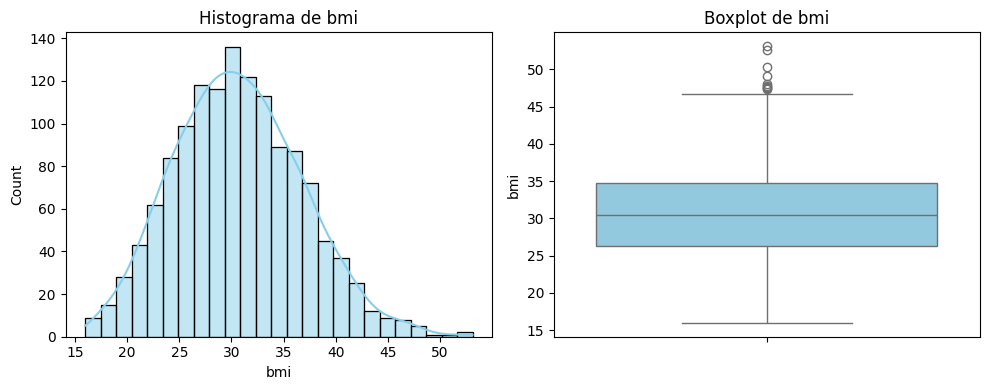

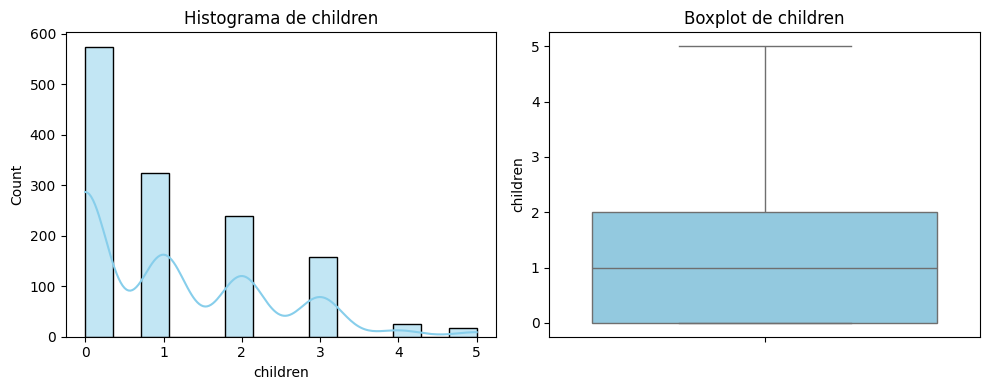

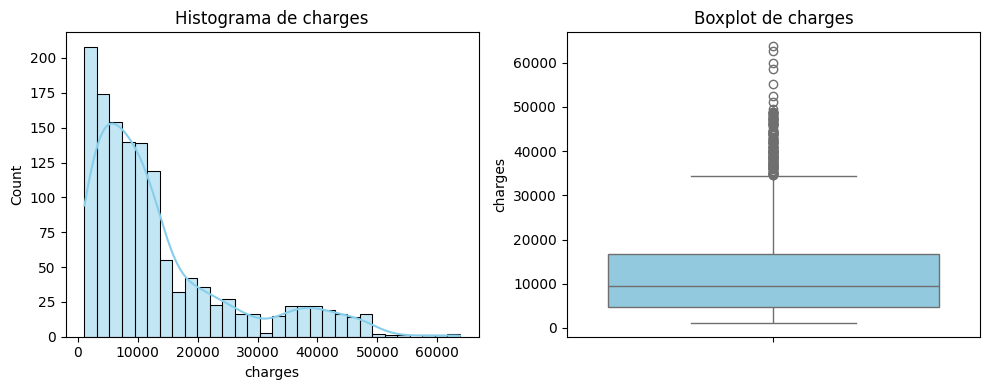





Sección de Variables Categóricas




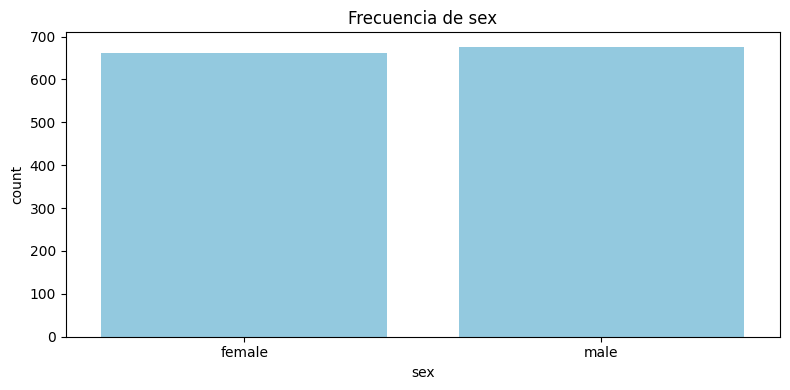

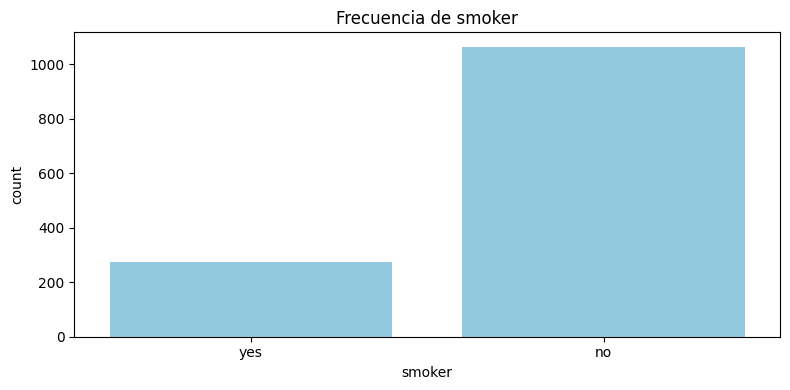

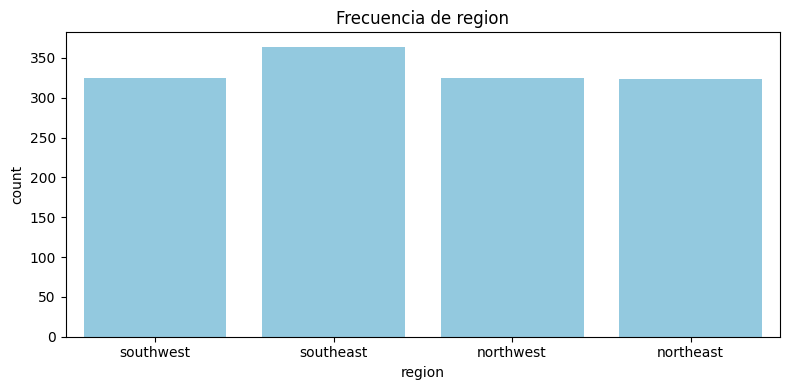

In [8]:
# Variables Cuantitativas
print("\n\nSección de Variables Cuantitativas\n\n")

variablesCuantitativas = ['age', 'bmi', 'children', 'charges']

for variable in variablesCuantitativas:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(insurance_df[variable], kde=True, color='skyblue')
    plt.title(f'Histograma de {variable}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=insurance_df[variable], color='skyblue')
    plt.title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()
    plt.close()
    print("\n")

# Variables Categóricas
print("\n\nSección de Variables Categóricas\n\n")

variablesCategoricas = ['sex', 'smoker', 'region']

for variable in variablesCategoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=insurance_df, color='skyblue')
    plt.title(f'Frecuencia de {variable}')
    plt.tight_layout()
    plt.show()
    plt.close()
    print("\n")

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

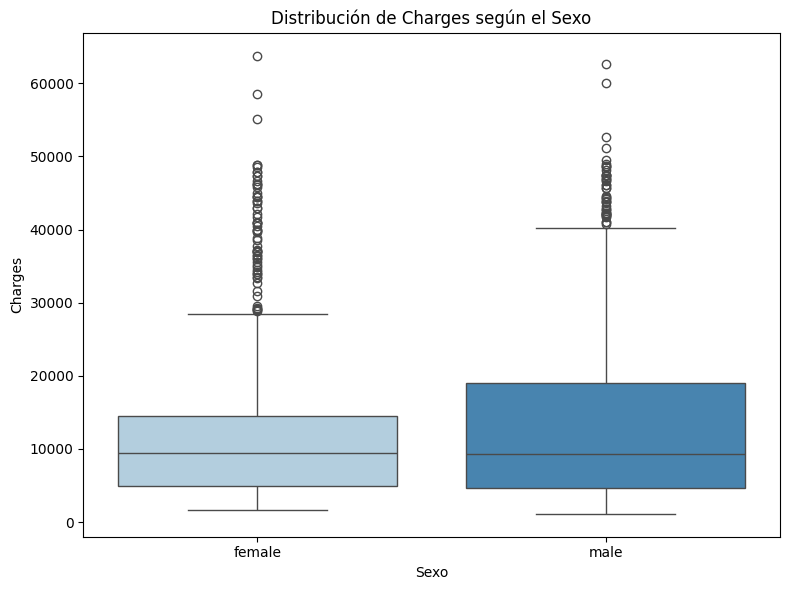


¿Hay diferencias significativas de las primas según el sexo?

Sí, hay diferencias significativas en las primas según el sexo (p-value = 0.03613).


In [9]:
print('\n')
# Comparación de la distribución de charges según el sexo
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df, hue='sex', dodge=False, palette='Blues')
plt.title('Distribución de Charges según el Sexo')
plt.xlabel('Sexo')
plt.ylabel('Charges')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Análisis estadístico para verificar diferencias significativas
from scipy.stats import ttest_ind

charges_male = insurance_df[insurance_df['sex'] == 'male']['charges']
charges_female = insurance_df[insurance_df['sex'] == 'female']['charges']

t_stat, p_value = ttest_ind(charges_male, charges_female)

print("\n¿Hay diferencias significativas de las primas según el sexo?\n")
if p_value < 0.05:
    print(f"Sí, hay diferencias significativas en las primas según el sexo (p-value = {p_value:.5f}).")
else:
    print(f"No, no hay diferencias significativas en las primas según el sexo (p-value = {p_value:.5f}).\n")

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

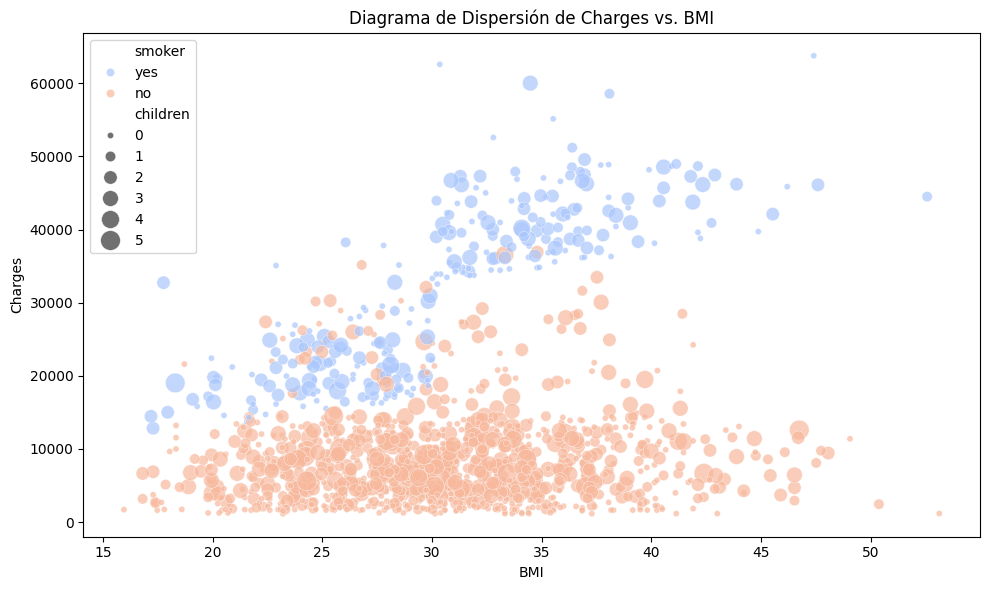




¿Hay alguna conclusión importante que se derive del gráfico?



La correlación entre BMI y Charges es: 0.20

Las primas medias de seguro para fumadores y no fumadores son:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

La correlación entre el número de hijos y Charges es: 0.07

Se observa que los fumadores tienden a tener primas de seguro más altas en comparación con los no fumadores.

Además, hay una tendencia a que las primas aumenten con el BMI.

También se observa una tendencia a que las primas aumenten con el número de hijos.


In [10]:
print('\n')
# Diagrama de dispersión de charges versus bmi con distinción por smoker y children
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', size='children', data=insurance_df, palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.title('Diagrama de Dispersión de Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Análisis de la relación entre las variables
correlacion_bmi_charges = insurance_df[['bmi', 'charges']].corr().iloc[0, 1]
correlacion_smoker_charges = insurance_df.groupby('smoker')['charges'].mean()
correlacion_children_charges = insurance_df[['children', 'charges']].corr().iloc[0, 1]

print('\n')
print("\n¿Hay alguna conclusión importante que se derive del gráfico?\n\n")
print(f"\nLa correlación entre BMI y Charges es: {correlacion_bmi_charges:.2f}")
print(f"\nLas primas medias de seguro para fumadores y no fumadores son:\n{correlacion_smoker_charges}")
print(f"\nLa correlación entre el número de hijos y Charges es: {correlacion_children_charges:.2f}")

if correlacion_smoker_charges['yes'] > correlacion_smoker_charges['no']:
    print("\nSe observa que los fumadores tienden a tener primas de seguro más altas en comparación con los no fumadores.")
if correlacion_bmi_charges > 0:
    print("\nAdemás, hay una tendencia a que las primas aumenten con el BMI.")
if correlacion_children_charges > 0:
    print("\nTambién se observa una tendencia a que las primas aumenten con el número de hijos.")

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

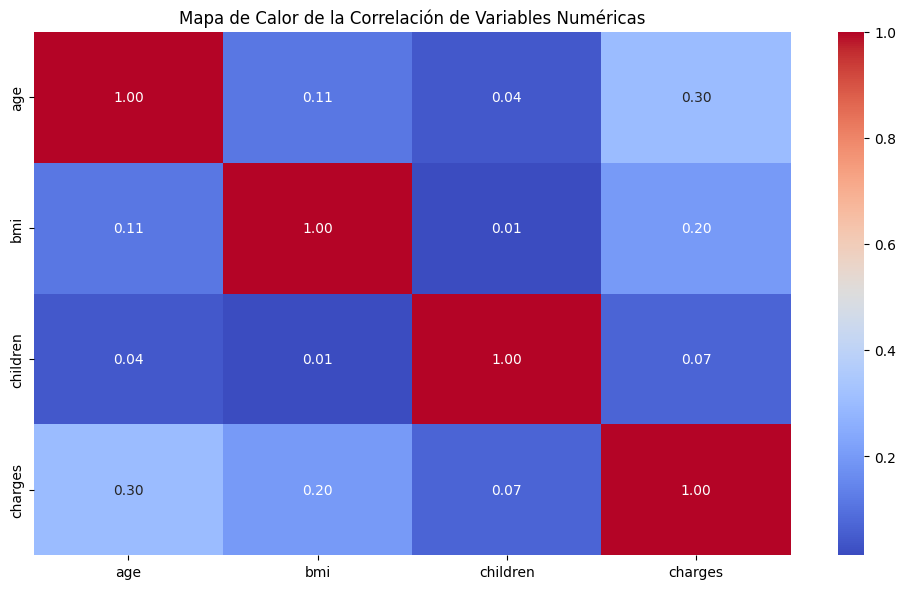

In [11]:
print('\n')
# Identificar las variables numéricas
numerical_vars = insurance_df.select_dtypes(include=[np.number]).columns.tolist()

# Mapa de calor de la correlación de las variables numéricas
plt.figure(figsize=(10, 6))
correlation_matrix = insurance_df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [12]:
# Obtener un dataframe con las observaciones que tengan valores atípicos en charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers_df = insurance_df[(insurance_df['charges'] < (Q1 - 1.5 * IQR)) | (insurance_df['charges'] > (Q3 + 1.5 * IQR))]

print("\n\nSe creó un nuevo dataframe con valores atípicos en charges llamado 'outliers_df'.\n")

print(outliers_df.head())

print

# Calcular el promedio de age y de bmi en el dataframe de valores atípicos
promedio_age = outliers_df['age'].mean()
promedio_bmi = outliers_df['bmi'].mean()

print(f"\nEl promedio de age en el dataframe de valores atípicos es: {promedio_age:.2f}")
print(f"El promedio de bmi en el dataframe de valores atípicos es: {promedio_bmi:.2f}\n")



Se creó un nuevo dataframe con valores atípicos en charges llamado 'outliers_df'.

    age     sex    bmi  children smoker     region     charges
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768
29   31    male  36.30         2    yes  southwest  38711.0000
30   22    male  35.60         0    yes  southwest  35585.5760

El promedio de age en el dataframe de valores atípicos es: 41.08
El promedio de bmi en el dataframe de valores atípicos es: 35.56



3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [13]:
# Porcentaje de observaciones que se corresponden a mujeres y a hombres
porcentaje_mujeres = (outliers_df['sex'] == 'female').mean() * 100
porcentaje_hombres = (outliers_df['sex'] == 'male').mean() * 100

# Porcentaje de observaciones que se corresponden a fumadores y no fumadores
porcentaje_fumadores = (outliers_df['smoker'] == 'yes').mean() * 100
porcentaje_no_fumadores = (outliers_df['smoker'] == 'no').mean() * 100

print(f"\nPorcentaje de mujeres en el dataframe de valores atípicos: {porcentaje_mujeres:.2f}%")
print(f"\nPorcentaje de hombres en el dataframe de valores atípicos: {porcentaje_hombres:.2f}%")
print(f"\nPorcentaje de fumadores en el dataframe de valores atípicos: {porcentaje_fumadores:.2f}%")
print(f"\nPorcentaje de no fumadores en el dataframe de valores atípicos: {porcentaje_no_fumadores:.2f}%\n")


Porcentaje de mujeres en el dataframe de valores atípicos: 35.97%

Porcentaje de hombres en el dataframe de valores atípicos: 64.03%

Porcentaje de fumadores en el dataframe de valores atípicos: 97.84%

Porcentaje de no fumadores en el dataframe de valores atípicos: 2.16%



# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [14]:
# Separar las variables del dataframe
X = insurance_df.drop(columns=['charges'])
y = insurance_df['charges']
print("\n")

print("Se han separado las variables del dataframe.")
print("\n")
print("X (predictores):")
print(X.head())

print("\ny (variable de respuesta):")
print(y.head())



Se han separado las variables del dataframe.


X (predictores):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

y (variable de respuesta):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [15]:
# Dividir el conjunto en entrenamiento y prueba (80:20) considerando la estratificación por la variable 'smoker'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=X['smoker'])

print("\nDivisión del conjunto de datos completada.")
print(f"\nTamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


División del conjunto de datos completada.

Tamaño de X_train: (1070, 6)
Tamaño de X_test: (268, 6)
Tamaño de y_train: (1070,)
Tamaño de y_test: (268,)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [16]:
# Identificar predictores numéricos y categóricos
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# Preparar el transformador
preprocessing = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

print(
    "\nTransformador 'preprocessing' preparado con escalamiento MinMax para predictores numéricos y codificación one-hot para categóricas."
)



Transformador 'preprocessing' preparado con escalamiento MinMax para predictores numéricos y codificación one-hot para categóricas.


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [17]:
# Crear el pipeline con el transformador y el modelo de regresión lineal
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
lr_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE del modelo: {rmse:.2f}")
print(f"\nR^2 del modelo: {r2:.2f}")


RMSE del modelo: 5699.03

R^2 del modelo: 0.75


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [18]:
print('\n')
# Calcular el límite superior para identificar outliers
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - insurance_df['charges'].quantile(0.25)
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers en y_train y y_test
y_train_cleaned = y_train.copy()
y_train_cleaned[y_train > upper_limit] = upper_limit

y_test_cleaned = y_test.copy()
y_test_cleaned[y_test > upper_limit] = upper_limit

# Crear el pipeline con el transformador y el modelo de regresión lineal
lr_model2 = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('regressor', LinearRegression())
])

# Entrenar el modelo con los datos limpiados
lr_model2.fit(X_train, y_train_cleaned)

# Evaluar el modelo en el conjunto de prueba con los datos limpiados
y_pred_cleaned = lr_model2.predict(X_test)
rmse_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"RMSE del modelo con outliers reemplazados: {rmse_cleaned:.2f}")
print(f"\nR^2 del modelo con outliers reemplazados: {r2_cleaned:.2f}")



RMSE del modelo con outliers reemplazados: 4811.65

R^2 del modelo con outliers reemplazados: 0.76


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [19]:
# Preparar el segundo transformador
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ])

# Crear el pipeline con el nuevo transformador y el modelo de regresión lineal
lr_model3 = Pipeline(steps=[
    ('preprocessor', preprocessing2),
    ('regressor', LinearRegression())
])

# Entrenar el modelo con los datos limpiados
lr_model3.fit(X_train, y_train_cleaned)

# Evaluar el modelo en el conjunto de prueba con los datos limpiados
y_pred_cleaned2 = lr_model3.predict(X_test)
rmse_cleaned2 = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned2))
r2_cleaned2 = r2_score(y_test_cleaned, y_pred_cleaned2)

print(f"\nRMSE del modelo con el segundo transformador y outliers reemplazados: {rmse_cleaned2:.2f}")
print(f"\nR^2 del modelo con el segundo transformador y outliers reemplazados: {r2_cleaned2:.2f}")


RMSE del modelo con el segundo transformador y outliers reemplazados: 4811.60

R^2 del modelo con el segundo transformador y outliers reemplazados: 0.76


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [20]:
# Definir el mejor grado de polinomio
best_degree = 2

# Crear las características polinomiales
polynomial_features = PolynomialFeatures(degree=best_degree)

# Crear el pipeline con el transformador, las características polinomiales y el modelo de regresión lineal
lr_model4 = Pipeline(steps=[
    ('preprocessor', preprocessing2),
    ('poly_features', polynomial_features),
    ('regressor', LinearRegression())
])

# Entrenar el modelo con los datos limpiados
lr_model4.fit(X_train, y_train_cleaned)

# Evaluar el modelo en el conjunto de prueba con los datos limpiados
y_pred_poly = lr_model4.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_poly))
r2_poly = r2_score(y_test_cleaned, y_pred_poly)

print(f"El mejor grado de polinomio es: {best_degree}")
print(f"RMSE del modelo polinomial: {rmse_poly:.2f}")
print(f"R^2 del modelo polinomial: {r2_poly:.2f}")

El mejor grado de polinomio es: 2
RMSE del modelo polinomial: 4285.57
R^2 del modelo polinomial: 0.81
